Okham's razor demonstration

In [8]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns




In [57]:
#making up some data
df = pd.DataFrame({'x':np.array([0,1,2]), 'y':np.array([1,1.6,2])})

xtest = np.linspace(df.x.min(), df.x.max(), 100)
df

,x,y
0,0,1.0
1,1,1.6
2,2,2.0


(0.8, 2.2)

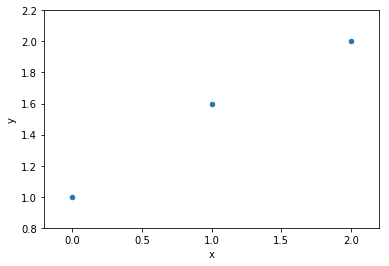

In [58]:
ax = df.plot(x='x', y='y', kind='scatter')
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(0.8, 2.2)


/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     75.00
Date:                Mon, 07 Sep 2020   Prob (F-statistic):             0.0732
Time:                        09:49:48   Log-Likelihood:                 4.9071
No. Observations:                   3   AIC:                            -5.814
Df Residuals:                       1   BIC:                            -7.617
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0333      0.075     13.864      0.046       0.086       1.980
x              0.5000      0.058      8.660      0.073      -0.234       1.234
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                           0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

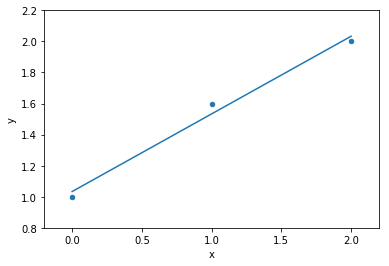

In [60]:
lr1 = smf.ols('y~x', data=df).fit()
ax = df.plot(x='x', y='y', kind='scatter')
ax.plot(xtest, lr1.predict(pd.DataFrame({'x':xtest})))
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(0.8, 2.2)

lr1.summary()

/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 07 Sep 2020   Prob (F-statistic):                nan
Time:                        09:48:00   Log-Likelihood:                 98.912
No. Observations:                   3   AIC:                            -191.8
Df Residuals:                       0   BIC:                            -194.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0000        inf          0        nan         nan         nan
I((x) ** 2)    -0.1000        inf         -0        nan         nan         nan
x               0.7000        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.744
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.287
Skew:                           0.111   Prob(JB):                        0.866
Kurtosis:                       1.500   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

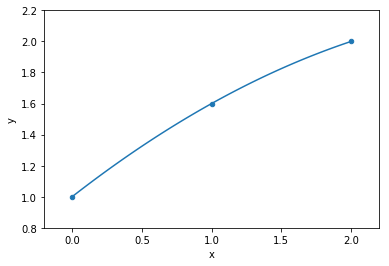

In [59]:
lr2 = smf.ols('y~I((x)**2)+x', data=df).fit()
lr2.summary()

ax = df.plot(x='x', y='y', kind='scatter')
ax.plot(xtest, lr2.predict(pd.DataFrame({'x':xtest})))
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(0.8, 2.2)

lr2.summary()

(0.8, 2.2)

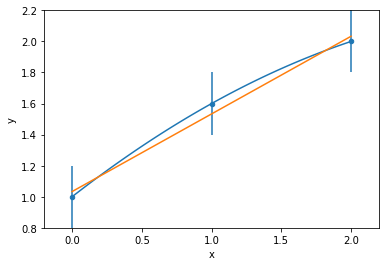

In [72]:
ax = df.plot(x='x', y='y', yerr=0.2, kind='scatter')
ax.plot(xtest, lr2.predict(pd.DataFrame({'x':xtest})))
ax.plot(xtest, lr1.predict(pd.DataFrame({'x':xtest})))
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(0.8, 2.2)


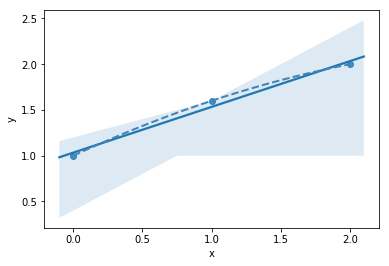

In [77]:
ax = sns.regplot(x="x", y="y", data=df);
ax.plot(xtest, lr2.predict(pd.DataFrame({'x':xtest})), color='SteelBlue', lw=2, ls='--')


In [ ]:
smf.ols('x~y', data=df)